In [1]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

# Plot inline
%matplotlib inline

# Set up tesseract
# pytesseract.pytesseract.tesseract_cmd = 'sudo /home/matejd/Programs/tesseract'
# tessdata_dir_config = '--tessdata-dir "/home/matejd/Programs/tesseract/tessdata"'

In [2]:
dataset_folder = '/home/matejd/Datasets/SportRadar/Examples/Bookings/'
image_files = sorted([join(dataset_folder,f) for f in listdir(dataset_folder) if isfile(join(dataset_folder, f))])
for im in image_files:
    print im

/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard1.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard10.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard11.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard12.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard13.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard14.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard15.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard16.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard17.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard18.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard19.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard2.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard3.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/YellowCard4.png
/home/matejd/Datasets/SportRadar/Examples/Bookings/Y

--oem 0


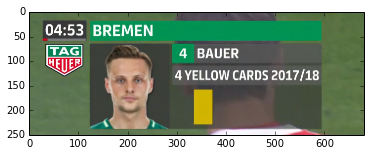

TesseractError: (1, u'Error opening data file /usr/local/share//tessdata/eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [4]:
for im in image_files:
    image = cv2.imread(im)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # print image
    # cv2.imshow('Booking',image)
    # cv2.waitKey(0)

    # Booking data window
    book_window=image_rgb[50:300,120:800,:]

    # Team name image
    team_image = book_window[20:60,125:500,:]
    # Time image
    time_image = book_window[10:60,20:120,:]
    # Player image
    player_image = book_window[65:110,280:600,:]
    # Card image
    card_image = book_window[110:240,280:600,:]

    # The image to run the recognition to
    # run_image = card_image

    # The configuration parameters
#     config_string = tessdata_dir_config
    
#     config_team = tessdata_dir_config + ' --psm 8'
#     config_player = tessdata_dir_config + ' --psm 7'
#     config_time = tessdata_dir_config + ' -c tessedit_char_whitelist=0123456789:'
    
    # Configuration for time recognition
    patterns_path = '"/home/matejd/PythonProjects/sport-radar/time_patterns.txt"'
    config_time = ' --oem 0 soccer-time'
    config_time = '--oem 0'
#     config_time = tessdata_dir_config + ' --psm 7 --eom 0 -c tessedit_char_whitelist=:0123456789'
    print config_time
    
#   0    Orientation and script detection (OSD) only.
#   1    Automatic page segmentation with OSD.
#   2    Automatic page segmentation, but no OSD, or OCR.
#   3    Fully automatic page segmentation, but no OSD. (Default)
#   4    Assume a single column of text of variable sizes.
#   5    Assume a single uniform block of vertically aligned text.
#   6    Assume a single uniform block of text.
#   7    Treat the image as a single text line.
#   8    Treat the image as a single word.
#   9    Treat the image as a single word in a circle.
#  10    Treat the image as a single character.
#  11    Sparse text. Find as much text as possible in no particular order.
#  12    Sparse text with OSD.
#  13    Raw line. Treat the image as a single text line,
#        bypassing hacks that are Tesseract-specific.


    plt.figure()
    plt.imshow(book_window)
    plt.show()
    time_string = pytesseract.image_to_string(time_image, config=config_time)
    team_string = pytesseract.image_to_string(team_image, config=config_team)
    player_string = pytesseract.image_to_string(player_image, config=config_player)
    card_string = pytesseract.image_to_string(card_image, config=config_string)
    # bboxes = pytesseract.image_to_boxes(run_image, lang='deu', config=config_string)
    print time_string
    print '--------------------------'
    print team_string
    print '--------------------------'
    print player_string
    print '--------------------------'
    print card_string
    print '--------------------------'
# print bboxes